#### Graph

node: vertex

edges: connection between two nodes \

weight: each edge has a weight associated with it, which indicates cost & vlaues associated with this connection

degree: Number fof edges that are connected to that node

in-degree: number of edges coming towards that node

out-degree: number of edges leaving away from that node

adjacent nodes: those nodes are directly connnected by edge

path: sequence of nodes where each connected by edge

cycle: there exists a cycle




1. Types

* **undirected graph**

    a. **in terms of weight**

    (1) weighted graph

    (2) unweighted graph

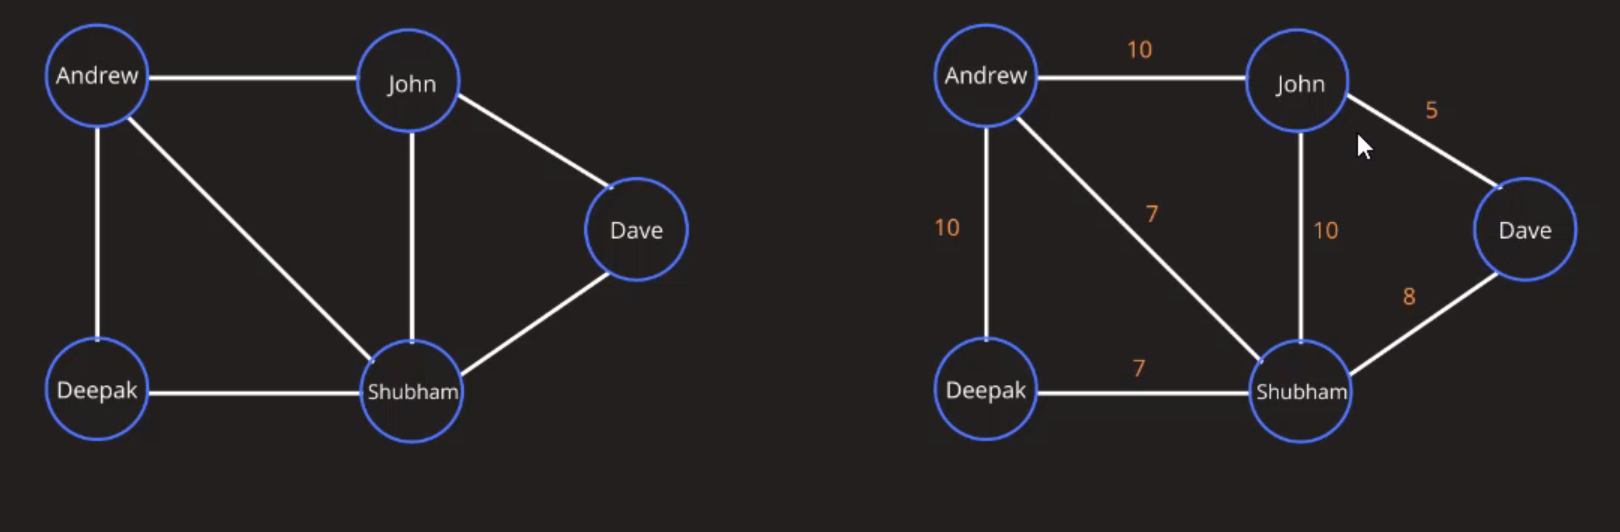





* **directed graph**

    with certain restriction



#### a more detailed classification:

* Undirected graph: A graph in which the edges have no direction, representing a two-way relationship between nodes. For example, if we consider each person on Instagram as a node and their connection with other users as edges, a two-way relationship occurs when person A follows person B and person B also follows person A.

* Directed graph: A graph in which the edges have a direction, indicating a one-way relationship between nodes. For example, if person A follows person B but person B doesn’t follow person A, it’s a one-way relationship.

* Weighted graph: A graph in which each edge has a numerical value assigned to it, indicating the cost, distance, or some other relevant measure associated with that connection. For example, if each person’s connection with the other person has some weight assigned to it, then the weight of 
8
 represents a strong connection between person A and person B and the weight of 
3
 indicates a weaker connection between person A and person C.

* Cyclic graph: A graph that contains at least one cycle, which is a path that starts and ends at the same node. For example, person A is friends with person B, who is friends with person C, and finally, person C is friends with person A, completing the cycle.

* Acyclic graph: A graph that contains no cycles, that is, there is no path that starts and ends at the same node. For example, person A is friends with person B, who is friends with person C, and finally, person C is friends with person D, not creating any cycle.



2. Use cases

    (1) undirected graph: social media

    (2) directed graph: like instagram following procedure. a follows b: a->b. But b hasn't followed a. This is especially useful for "suggest for connection" and "ads pinpoint"


3. data structure

* adjency list: a collection of list, where each node represents a sublist which contains node with their neighbors and weight

* matrix: 2D matrix where $matrix[i][j]$ where represents edge between i and j. if it's 1, it not weighted




#### Graph traversal

(1) **Depth-first search (DFS)**

In DFS, the strategy is to explore as far as possible along one path before turning back. The algorithm starts with a chosen source node and proceeds to one of its neighbor nodes while marking the source node as visited. From there, it goes to one of its neighbors and marks this newly traversed node as visited. This continues until it reaches a node with no neighbors. Now, the algorithm starts backtracking. In backtracking, the algorithm goes one step back and checks for the remaining neighbor nodes that are yet to be explored. This process continues until all the nodes in the graph, that are reachable from the source node, have been visited.

We can implement this algorithm using a stack. Initialize an empty stack and choose a source node, push it onto the stack, and mark it as visited. While the stack is not empty, pop a node, explore its unvisited neighbors, and push them onto the stack, marking them as visited. Continue this process until reaching a node with no unvisited neighbors, then backtrack by popping from the stack. Repeat until the stack is empty, ensuring all connected nodes are visited.





(2) **Breadth-first search (BFS)**

In BFS, the strategy is to explore the graph in layers, one level at a time. The algorithm begins at a chosen source node and visits all its immediate neighbor nodes while marking them as visited. It then moves on to visit the neighbors of those nodes before proceeding to the next level of neighbors. This process continues until all the nodes in the graph, that are reachable from the source node, have been visited.

We can implement this algorithm using a queue. Initialize an empty queue and choose a source node, enqueue it, and then enter a loop. Within this loop, the algorithm dequeues a node from the front of the queue, visits its immediate neighbors, and marks them as visited. These neighbors are subsequently enqueued into the queue. The queue plays a crucial role in determining the order of exploration, ensuring that nodes at the current level are processed before progressing to the next. This iterative process continues until the queue is empty, signifying that all reachable nodes from the source have been visited.



There are various algorithms that help us solve these specific graph problems. Let’s go over a few:

Dijkstra’s algorithm: It’s a variation of DFS and finds the shortest path between two nodes in a weighted graph.

Bellman-Ford algorithm: It’s a variation of BFS and finds the shortest paths in a weighted graph, even when negative edge weights are present.

Floyd-Warshall algorithm: It’s a variation of BFS and finds the shortest paths between all pairs of nodes in a weighted graph.

Topological sorting: It’s similar to DFS and orders nodes in a directed acyclic graph (DAG) to satisfy dependencies.

Prim’s algorithm: It finds the minimum spanning tree of a connected, undirected graph.

Kruskal’s algorithm: It also finds the minimum spanning tree of a connected, undirected graph.



In [1]:
# BFS abd DFS implementation
class Node():

    def __init__(self, value):
        self.value = value
        self.adjacent_list = []

        # whether visisted or not
        self.visited = False


class Graph():
    def BFS(self,node):
        # feel free to replace queue with deque class
        
        queue = []
        # add first node
        queue.append(node)
        node.visited = True
        traversal = []

        while queue:
            actual_node = queue.pop(0)
            traversal.append(actual_node.value)

            for element in actual_node.adjacent_list:
                if not element.visited:
                    element.visited = True
                    queue.append(element)
        
        return traversal

    def DFS(self,node, traversal):
        # use recursion method
        # start node
        node.visited = True
        traversal.append(node.value)

        for element in node.adjacent_list:
            if not element.visited:
                self.DFS(element, traversal)
        
        return traversal

        

node1 = Node("A")
node2 = Node("B")
node3 = Node("C")
node4 = Node("D")
node5 = Node("E")
node6 = Node("F")
node7 = Node("G")

# a is connected to b, c, d
node1.adjacent_list.append(node2)
node1.adjacent_list.append(node3)
node1.adjacent_list.append(node4)

# B is connected to E, F
node2.adjacent_list.append(node5)
node2.adjacent_list.append(node6)

# D is connected to G
node4.adjacent_list.append(node7)

# connect c to a - cyclic
node3.adjacent_list.append(node1)



In [4]:
# implement bfs
graph = Graph()
print(graph.BFS(node1))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [11]:
# implement dfs
graph = Graph()
print(graph.DFS(node1, []))


['A', 'B', 'E', 'F', 'C', 'D', 'G']


#### Q1

https://leetcode.com/problems/network-delay-time/

Leetcode 743

In [20]:
# Q1 depth first search

from typing import List
import collections

class Solution:
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        # Create adjacency list
        adj = collections.defaultdict(list)
        for source, dest, time in times:
            adj[source].append((time, dest))
        
        # Sort the edges for each node based on travel time
        for source in adj:
            adj[source].sort()
        
        signal_received_at = [float('inf')] * (n + 1)  # Use n + 1 elements
        
        def dfs(curr_node: int, curr_time: int):
            # If the current time is greater than or equal to the recorded time, return
            if curr_time >= signal_received_at[curr_node]:
                return
            
            # Update the time for the current node
            signal_received_at[curr_node] = curr_time
            
            # Traverse all adjacent nodes
            for time, next_node in adj[curr_node]:
                dfs(next_node, curr_time + time)
        
        # Start DFS from node k
        dfs(k, 0)
        
        # Find the maximum time in signal_received_at, excluding index 0
        max_time = max(signal_received_at[1:])
        
        # If any node is unreachable, return -1
        return max_time if max_time < float('inf') else -1

defaultdict(list, {1: [2, 3], 2: [3]})

In [21]:
for i,j in [[1,2],[3,4]]:
    print(i,j)

1 2
3 4


#### Q2

https://leetcode.com/problems/paths-in-maze-that-lead-to-same-room/description/

LC 2077

In [2]:
def generate_adjacency_matrix(n, corridors):
    adj_matrix = [[0] * n for _ in range(n)]
    for room1, room2 in corridors:
        adj_matrix[room1 - 1][room2 - 1] = 1
        adj_matrix[room2 - 1][room1 - 1] = 1
    return adj_matrix

def dfs(n, adj_matrix, cycle_len, start_node, current_node, visited, total_cycles):
    if cycle_len == 3:
        if current_node == start_node:
            total_cycles[0] += 1
        return

    visited[current_node - 1] = True

    for next_node in range(n):
        if adj_matrix[current_node - 1][next_node] == 1 and (next_node + 1 != start_node or cycle_len == 2):
            if not visited[next_node]:
                dfs(n, adj_matrix, cycle_len + 1, start_node, next_node + 1, visited, total_cycles)
    
    visited[current_node - 1] = False

def confusion_score_of_maze(n, corridors):
    adj_matrix = generate_adjacency_matrix(n, corridors)
    total_cycles = [0]  # Use a list to mutate integer in recursive calls

    for start_node in range(1, n + 1):
        visited = [False] * n
        dfs(n, adj_matrix, 0, start_node, start_node, visited, total_cycles)
    
    return total_cycles[0] // 6

# Example usage
n = 5
corridors = [[1, 2], [2, 3], [3, 1], [3, 4], [4, 5]]
print(confusion_score_of_maze(n, corridors))  # Should output the number of unique cycles of length 3



0


In [12]:
total_cycles = 0
def generate_adjacency_matrix(n, corridors):
    adj_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for corridor in corridors:
        adj_matrix[corridor[0]-1][corridor[1]-1] = 1
        adj_matrix[corridor[1]-1][corridor[0]-1] = 1
    return adj_matrix

def dfs(n, adj_matrix, cycle_len, start_node, current_node, visited):
    if cycle_len == 3:
        if adj_matrix[current_node - 1][start_node - 1] == 1:  # Ensure there's an edge back to the start node
            global total_cycles
            total_cycles += 1
        return  # Return after checking for a complete cycle or if max cycle length is reached

    visited[current_node - 1] = True  # Mark the current node as visited

    for next_node in range(1, n + 1):
        if adj_matrix[current_node - 1][next_node - 1] == 1 and not visited[next_node - 1]:
            dfs(n, adj_matrix, cycle_len + 1, start_node, next_node, visited)

    visited[current_node - 1] = False  # Unmark the node after recursion

def number_of_paths(n, corridors):
    adj_matrix = generate_adjacency_matrix(n, corridors)
    global total_cycles
    total_cycles = 0

    for start_node in range(1, n + 1):
        visited = [False] * n
        dfs(n, adj_matrix, 0, start_node, start_node, visited)

    return total_cycles // 6

# Example usage
n = 5
corridors = [[1, 2], [2, 3], [3, 1], [3, 4], [4, 5]]
print(number_of_paths(n, corridors))  # Outputs the number of unique cycles of length 3

0
